<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = 'datasets/metadata.csv'
phone_data = pd.read_csv(filepath)

phone_data.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [3]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [4]:
phone_data.describe()

,Latitude,Longitude
count,10476.000000,10476.000000
mean,-35.136188,150.612841
std,3.141723,1.470169
min,-42.884810,144.848243
25%,-33.884603,151.202296
50%,-33.796610,151.266540
75%,-33.788150,151.266540
max,-33.557310,151.289340


In [5]:
# Make the dataframe's columns more Python-friendly
new_columns = list(map(lambda col: col.replace(' ','_').lower(),list(phone_data.columns)))
phone_data.columns = new_columns

In [6]:
phone_data['comm_timestamp'] = phone_data['comm_timedate_string'].astype('datetime64')

phone_data.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude,comm_timestamp
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,2014-04-01 09:40:00
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,2014-04-01 09:42:00
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,2014-04-01 17:27:00


In [7]:
phone_data.index = phone_data['comm_timestamp']

In [8]:
phone_data = phone_data.drop('comm_timestamp', axis=1)
phone_data.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-04-01 09:40:00,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
2014-04-01 09:42:00,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2014-04-01 13:13:00,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
2014-04-01 13:13:00,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
2014-04-01 17:27:00,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [9]:
phone_data.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-04-01 09:40:00,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
2014-04-01 09:42:00,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2014-04-01 13:13:00,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
2014-04-01 13:13:00,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
2014-04-01 17:27:00,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [10]:
phone_data['cell_tower_location'].value_counts()

BALGOWLAH HAYES ST                          4301
CHIPPENDALE                                 1084
SUNDERLAND ST                                723
REDFERN TE                                   712
HAYMARKET #                                  563
BRICKWORKS                                   501
HARBORD 22 WAINE ST                          465
FAIRLIGHT 137 SYDNEY RD                      454
MANLY #                                      231
NEW TOWN                                     197
CHINATOWN                                    161
BEECHWORTH                                   112
BALGOWLAH VILLAGE SHOPPING CENTRE IBC        106
MANLY SOUTH STEYNE                            92
BROADWAY OTC                                  85
MASCOT INTERNATIONAL AIRPORT TERMINAL T1      65
71 MACQUARIE ST                               49
SURRY HILLS 418A ELIZABETH ST                 45
MANLY NTH STEYNE                              40
MASCOT M5 MOTORWAY EMERGENCY STAIRS           33
BALGOWLAH TE        

In [18]:
balgowlah = phone_data.loc[phone_data['cell_tower_location'] == 'BALGOWLAH HAYES ST']
chippendale = phone_data.loc[phone_data['cell_tower_location'] == 'CHIPPENDALE']

In [19]:
balgowlah.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-09-24 17:17:00,505012056EF02,BALGOWLAH HAYES ST,NaN,9/24/14 17:17,Internet,-33.78815,151.26654
2014-09-24 19:08:00,505012056EF02,BALGOWLAH HAYES ST,NaN,9/24/14 19:08,Internet,-33.78815,151.26654
2014-09-24 19:08:00,505012056EF02,BALGOWLAH HAYES ST,NaN,9/24/14 19:08,Internet,-33.78815,151.26654
2014-09-24 19:09:00,505012056EF02,BALGOWLAH HAYES ST,NaN,9/24/14 19:09,Internet,-33.78815,151.26654
2014-09-24 19:10:00,505012056EF02,BALGOWLAH HAYES ST,NaN,9/24/14 19:10,Internet,-33.78815,151.26654


In [20]:
chippendale.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-04-01 17:36:00,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.20235
2014-04-01 17:40:00,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.20235
2014-04-04 09:47:00,5050101537A4A,CHIPPENDALE,91aba4a11359ff3af7902428d20cfa7e676c36e7,4/4/14 9:47,Phone,-33.884171,151.20235
2014-04-04 18:10:00,5050101536E5E,CHIPPENDALE,91aba4a11359ff3af7902428d20cfa7e676c36e7,4/4/14 18:10,Phone,-33.884171,151.20235
2014-04-10 21:35:00,50501015334B6,CHIPPENDALE,70e1f163d854d4e9b63e9a3f4056ced467567d85,4/10/14 21:35,SMS,-33.884171,151.20235


In [21]:
balgowlah.comm_type.value_counts()

Internet    3929
SMS          206
Phone        166
Name: comm_type, dtype: int64

In [22]:
chippendale.comm_type.value_counts()

Internet    981
Phone        74
SMS          29
Name: comm_type, dtype: int64

In [14]:
phone_data.comm_type.value_counts()

Internet    9102
Phone        717
SMS          657
Name: comm_type, dtype: int64

This person's most commonly used cell tower is Balgowlah Hayes St. in Sydney, Australia. The user primarily uses the device to access the internet, although they are also making calls and texting.

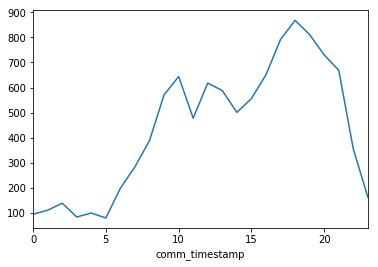

In [15]:
phone_data.groupby(phone_data.index.hour).cell_cgi.count().plot();

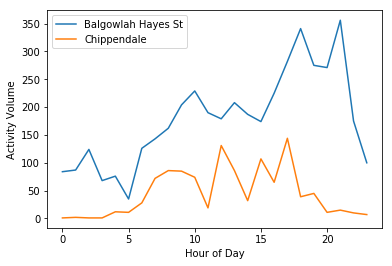

In [26]:
plt.plot(balgowlah.groupby(balgowlah.index.hour).cell_cgi.count())
plt.plot(chippendale.groupby(chippendale.index.hour).cell_cgi.count())

plt.xlabel('Hour of Day')
plt.ylabel('Activity Volume')
plt.legend(['Balgowlah Hayes St','Chippendale'])
plt.show()

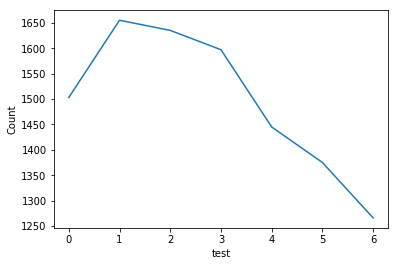

In [42]:
plt.plot(phone_data.groupby(phone_data.index.dayofweek).cell_cgi.count())
plt.xlabel('Day of Week')
plt.ylabel('Count')

plt.show()

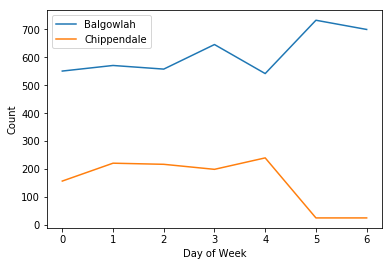

In [48]:
plt.plot(balgowlah.groupby(balgowlah.index.dayofweek).cell_cgi.count())
plt.plot(chippendale.groupby(chippendale.index.dayofweek).cell_cgi.count())

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(['Balgowlah','Chippendale'])
plt.show()

Looking at the user's two most frequently used cell towers by hour of day and day of week, we can begin to deduce that this person lives near the Balgowlah tower and works by the Chippendale tower.

In [52]:
internet = phone_data.loc[phone_data['comm_type'] == 'Internet']
internet.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-09-23 06:34:00,505010152532C,FAIRLIGHT 137 SYDNEY RD,NaN,9/23/14 6:34,Internet,-33.796610,151.277560
2014-09-23 09:10:00,5.05E+12,MANLY #,NaN,9/23/14 9:10,Internet,-33.796679,151.285293
2014-09-23 09:10:00,5.05E+12,MANLY #,NaN,9/23/14 9:10,Internet,-33.796679,151.285293
2014-09-23 09:10:00,505010152532C,FAIRLIGHT 137 SYDNEY RD,NaN,9/23/14 9:10,Internet,-33.796610,151.277560
2014-09-23 09:16:00,5.05E+12,HARBORD 22 WAINE ST,NaN,9/23/14 9:16,Internet,-33.779333,151.276901


In [53]:
phone = phone_data.loc[phone_data['comm_type'] == 'Phone']
phone.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-04-01 09:40:00,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
2014-04-01 09:42:00,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2014-04-01 13:13:00,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
2014-04-01 13:13:00,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
2014-04-01 17:27:00,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


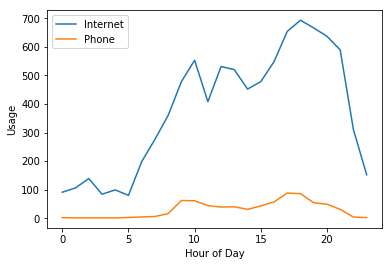

In [54]:
plt.plot(internet.groupby(internet.index.hour).cell_cgi.count())
plt.plot(phone.groupby(phone.index.hour).cell_cgi.count())
plt.xlabel('Hour of Day')
plt.ylabel('Usage')
plt.legend(['Internet','Phone'])
plt.show()

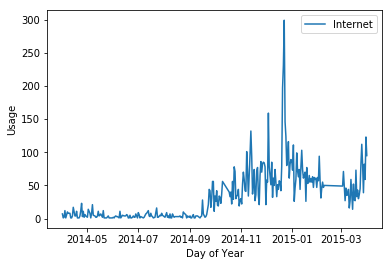

In [72]:
plt.plot(phone_data.groupby(phone_data.index.date).cell_cgi.count())
plt.xlabel('Day of Year')
plt.ylabel('Usage')
plt.legend(['Internet','Phone'])
plt.show()

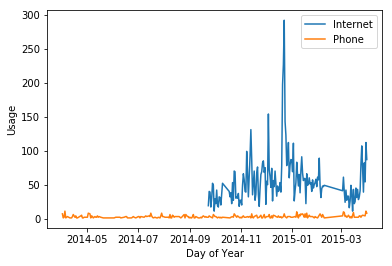

In [71]:
plt.plot(internet.groupby(internet.index.date).cell_cgi.count())
plt.plot(phone.groupby(phone.index.date).cell_cgi.count())
plt.xlabel('Day of Year')
plt.ylabel('Usage')
plt.legend(['Internet','Phone'])
plt.show()

The user's internet and phone usage indicate that they have only had internet access since late September of 2014. It is likely that this person purchased a smart phone around that time.

In [76]:
# Investigate the spike in internet usage in December of 2014

internet.loc['2014-12'].tail()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-12-31 21:40:00,505012056EF02,BALGOWLAH HAYES ST,NaN,12/31/14 21:40,Internet,-33.78815,151.26654
2014-12-31 21:40:00,505012056EF02,BALGOWLAH HAYES ST,NaN,12/31/14 21:40,Internet,-33.78815,151.26654
2014-12-31 21:43:00,505012056EF02,BALGOWLAH HAYES ST,NaN,12/31/14 21:43,Internet,-33.78815,151.26654
2014-12-31 21:43:00,505012056EF02,BALGOWLAH HAYES ST,NaN,12/31/14 21:43,Internet,-33.78815,151.26654
2014-12-31 21:49:00,505012056EF02,BALGOWLAH HAYES ST,NaN,12/31/14 21:49,Internet,-33.78815,151.26654


In [78]:
internet.loc['2014-12'].shape

(2603, 7)

In [81]:
internet.loc['2014-12']['cell_tower_location'].value_counts().head(5)

BALGOWLAH HAYES ST    922
SUNDERLAND ST         576
BRICKWORKS            380
CHIPPENDALE           175
NEW TOWN              135
Name: cell_tower_location, dtype: int64

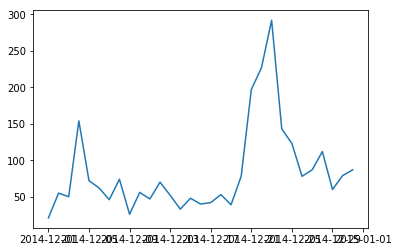

In [83]:
plt.plot(internet['2014-12'].groupby(internet['2014-12'].index.date).cell_cgi.count())
plt.show()

In [89]:
internet['2014-12'].groupby(internet['2014-12'].index.date).cell_cgi.count().sort_values(ascending=False).head(10)

2014-12-23    292
2014-12-22    227
2014-12-21    197
2014-12-04    154
2014-12-24    143
2014-12-25    123
2014-12-28    112
2014-12-31     87
2014-12-27     87
2014-12-30     79
Name: cell_cgi, dtype: int64

The person's highest usage occurred on December 23rd.

In [90]:
internet['2014-12-23'].head(20)

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude
comm_timestamp,,,,,,,
2014-12-23 03:09:00,505012950037C,SUNDERLAND ST,NaN,12/23/14 3:09,Internet,-42.84338,147.29569
2014-12-23 07:39:00,505012950037C,SUNDERLAND ST,NaN,12/23/14 7:39,Internet,-42.84338,147.29569
2014-12-23 08:14:00,5.05E+12,NEW TOWN,NaN,12/23/14 8:14,Internet,-42.85307,147.31532
2014-12-23 08:14:00,5.05E+12,NEW TOWN,NaN,12/23/14 8:14,Internet,-42.85307,147.31532
2014-12-23 08:18:00,5050129505A15,BRICKWORKS,NaN,12/23/14 8:18,Internet,-42.85984,147.29215
2014-12-23 08:23:00,505012950037C,SUNDERLAND ST,NaN,12/23/14 8:23,Internet,-42.84338,147.29569
2014-12-23 08:23:00,505012950037C,SUNDERLAND ST,NaN,12/23/14 8:23,Internet,-42.84338,147.29569
2014-12-23 08:24:00,5050129505A15,BRICKWORKS,NaN,12/23/14 8:24,Internet,-42.85984,147.29215
2014-12-23 08:27:00,5050129505A15,BRICKWORKS,NaN,12/23/14 8:27,Internet,-42.85984,147.29215


In [92]:
internet['2014-12-23'].cell_tower_location.value_counts()

SUNDERLAND ST    156
BRICKWORKS       114
NEW TOWN          20
MAQUARIE ST        2
Name: cell_tower_location, dtype: int64

On December 23rd, the person's most frequently used cell tower was Sunderland St. in Hobart, Tasmania. This may be the location of a relative's house, possibly parents or in-laws since it is 2 days from Christmas.